In [59]:
import music21
import numpy as np
import matplotlib.pyplot as plt
import functools
import glob
from sklearn.decomposition import PCA

In [60]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [61]:
def load(name):
    embeddings = np.loadtxt('{}.embeddings'.format(name, delimiter='\t'))
    with open('{}.labels'.format(name), 'r') as f:
        labels = [l.strip() for l in f.readlines()]
    return embeddings, labels

In [62]:
@functools.lru_cache(maxsize=None)
def c_to_strep(c):
    rep = ""
    for i in range(12):
        if i in c.pitchClasses:
            rep += "1"
        else:
            rep += "0"
    return rep

@functools.lru_cache(maxsize=None)
def strep_to_c(strep):
    pcs = []
    for i, v in enumerate(strep):
        if v == '1':
            pcs.append(i)
    return music21.chord.Chord(pcs)

def transpose_to_all(c):
    out = []
    old = c
    for i in range(12):
        new = old.transpose(7)
        out.append(new)
        old = new
    return out

In [67]:
major = music21.chord.Chord('C E G')

all_major = transpose_to_all(major)

all_major_str = [c_to_strep(c) for c in all_major]

In [68]:
def scatter_only(to_plot):
    to_plot_indices = [l.index(strep) for strep in to_plot]
    pca = PCA(n_components=2)
    proj = pca.fit_transform(e)  
    subset = proj[to_plot_indices]
    plt.scatter(subset[:,0], subset[:,1])

In [69]:
to_load = [fn.replace('.labels', '') for fn in glob.glob('./tf/17C.labels')]

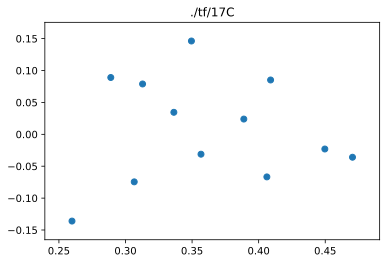

In [70]:
for base in to_load:
    e, l = load(base)
    scatter_only(all_major_str)
    plt.title(base)
    plt.show()